<a href="https://colab.research.google.com/github/Andoniadou-Lab/consensus_pituitary_atlas/blob/main/Supp_Fig_12/Supp_Fig_12_atac_revision_scatterplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scanpy
!pip install anndata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.6/176.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 124.9 MB/s eta 0:00:00


In [2]:
pip install decoupler==1.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 90.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.12 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
fast-array-utils 1.3.1 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.37.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.2

In [3]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#load atac pseudobulk
import scanpy as sc
import anndata as ad
import decoupler as dc


# Loading pseudobulk object for ATAC seq

In [2]:
#open /content/drive/MyDrive/pituitary_atlas/Unstructured/pdatas0828.h5ad
adata = sc.read("/content/drive/MyDrive/pituitary_atlas/Unstructured/pb_h5ad_2026_01_28.h5ad")

In [3]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/pituitary_atlas/source_table/pituitary_atlas.xlsx')
#reset
df.reset_index(drop=True, inplace=True)
df

,GEO,SRA_ID,Name,Conditions,Normal,Background,Sorted,Author,DOI,Age,...,filtering_junk,median_cellassign_prob,most_recent_workflow,n_cells,processed_atac,passed_qc_tcc,tcc_pseudobulked,Core,Notes 1,Notes 2
0,GSM4594333,SRX8489818,M-Pituitary,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,1278.0,0.0,1.0,v_0.01,1,NaN,NaN
1,GSM4594334,SRX8489819,FM_Pit_1-1,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,8236.0,0.0,1.0,v_0.01,1,NaN,NaN
2,GSM4594335,SRX8489820,FM_Pit_1-2,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,7092.0,0.0,1.0,v_0.01,1,NaN,NaN
3,GSM4594336,SRX8489821,MM_Pit_4-1,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,1755.0,0.0,1.0,v_0.01,1,NaN,NaN
4,GSM4594337,SRX8489822,MM_Pit_1v2,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,416.0,0.0,1.0,v_0.01,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,GSM9302173,SRX31166359,"pituitary, HFD_2",high_fat_diet,1,Unclear,0,Guo et al. (2025),NaN,16 weeks,...,1.0,1.0,v_0.01,7193.0,NaN,NaN,NaN,1,NaN,NaN
279,GSM9302174,SRX31166360,"pituitary, ND_1",normal,0,Unclear,0,Guo et al. (2025),NaN,16 weeks,...,1.0,1.0,v_0.01,7298.0,NaN,NaN,NaN,1,NaN,NaN
280,GSM9302175,SRX31166361,"pituitary, ND_2",normal,0,Unclear,0,Guo et al. (2025),NaN,16 weeks,...,1.0,1.0,v_0.01,7530.0,NaN,NaN,NaN,1,NaN,NaN
281,GSM9459038,SRX31798127,POMC-WT,POMC-WT,1,C57BL/6J,0,Sochodolsky et al. (2026),NaN,386 days,...,1.0,1.0,v_0.01,8083.0,NaN,NaN,NaN,1,NaN,NaN


# Splitting by author and sex of samples

In [4]:
geo_to_author = df.set_index("GEO")["Author"].to_dict()


In [5]:
adata.obs["Author"] = adata.obs["sample"].map(geo_to_author)
adata.obs

,sample,cell_type,Sex,_scvi_batch,_scvi_labels,Conditions,Author,Modality,GEO,psbulk_n_cells,psbulk_counts
GSM4594382_Corticotrophs,GSM4594382,Corticotrophs,1.0,0,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594382,116.0,1715443.0
GSM4594385_Corticotrophs,GSM4594385,Corticotrophs,0.0,3,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594385,259.0,2138869.0
GSM4594386_Corticotrophs,GSM4594386,Corticotrophs,0.0,4,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594386,385.0,1785188.0
GSM4594387_Corticotrophs,GSM4594387,Corticotrophs,0.0,5,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594387,557.0,2550936.0
GSM4594388_Corticotrophs,GSM4594388,Corticotrophs,0.0,6,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594388,757.0,5904416.0
...,...,...,...,...,...,...,...,...,...,...,...
GSM9301723_Thyrotrophs,GSM9301723,Thyrotrophs,1.0,42,0,Fshb-Enh2-KO,Jin et al. (2025),atac,GSM9301723,113.0,848763.0
GSM9301724_Thyrotrophs,GSM9301724,Thyrotrophs,1.0,43,0,IgG-treated,Jin et al. (2025),atac,GSM9301724,180.0,1679595.0
GSM9301725_Thyrotrophs,GSM9301725,Thyrotrophs,1.0,44,0,IgG-treated,Jin et al. (2025),atac,GSM9301725,106.0,923346.0
GSM9301727_Thyrotrophs,GSM9301727,Thyrotrophs,1.0,46,0,Bimagrumab-treated,Jin et al. (2025),atac,GSM9301727,152.0,1223248.0


In [6]:
#rename Sex as 0 == Female and 1 == Male
adata.obs["Sex"] = adata.obs["Sex"].replace({"0.0": "Female", "1.0": "Male"})
adata.obs

/tmp/ipython-input-4190748897.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs["Sex"] = adata.obs["Sex"].replace({"0.0": "Female", "1.0": "Male"})


,sample,cell_type,Sex,_scvi_batch,_scvi_labels,Conditions,Author,Modality,GEO,psbulk_n_cells,psbulk_counts
GSM4594382_Corticotrophs,GSM4594382,Corticotrophs,Male,0,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594382,116.0,1715443.0
GSM4594385_Corticotrophs,GSM4594385,Corticotrophs,Female,3,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594385,259.0,2138869.0
GSM4594386_Corticotrophs,GSM4594386,Corticotrophs,Female,4,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594386,385.0,1785188.0
GSM4594387_Corticotrophs,GSM4594387,Corticotrophs,Female,5,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594387,557.0,2550936.0
GSM4594388_Corticotrophs,GSM4594388,Corticotrophs,Female,6,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594388,757.0,5904416.0
...,...,...,...,...,...,...,...,...,...,...,...
GSM9301723_Thyrotrophs,GSM9301723,Thyrotrophs,Male,42,0,Fshb-Enh2-KO,Jin et al. (2025),atac,GSM9301723,113.0,848763.0
GSM9301724_Thyrotrophs,GSM9301724,Thyrotrophs,Male,43,0,IgG-treated,Jin et al. (2025),atac,GSM9301724,180.0,1679595.0
GSM9301725_Thyrotrophs,GSM9301725,Thyrotrophs,Male,44,0,IgG-treated,Jin et al. (2025),atac,GSM9301725,106.0,923346.0
GSM9301727_Thyrotrophs,GSM9301727,Thyrotrophs,Male,46,0,Bimagrumab-treated,Jin et al. (2025),atac,GSM9301727,152.0,1223248.0


# Re-pseudobulking to average datasets within studies

In [24]:
adata_grouped = dc.get_pseudobulk(
        adata,
        sample_col='Author',
        groups_col='Sex',
        mode='mean',
        min_cells=0,
        min_counts=0
    )

In [25]:
#normalise to 1M
sc.pp.normalize_total(adata_grouped, target_sum=1e6)

In [26]:
#subset for 5000 random genes
import numpy as np
#adata_grouped = adata_grouped[:, np.random.choice(adata_grouped.shape[1], 5000, replace=False)]

In [27]:
#add new line character after et al.
adata_grouped.obs.index = adata_grouped.obs.index.str.replace('et al.', 'et al.\n')
adata_grouped.obs['Author'] = adata_grouped.obs['Author'].str.replace('et al.', 'et al.\n')

In [28]:
adata_grouped.obs

,Author,Sex,_scvi_labels,Modality,psbulk_n_cells,psbulk_counts
Ruf-Zamojski et al.\n (2021)_Female,Ruf-Zamojski et al.\n (2021),Female,0,atac,44.0,339542176.0
Wang et al.\n (2024)_Female,Wang et al.\n (2024),Female,0,multi_atac,119.0,812552000.0
Bohaczuk et al.\n (2021)_Male,Bohaczuk et al.\n (2021),Male,0,atac,11.0,77875912.0
Jin et al.\n (2025)_Male,Jin et al.\n (2025),Male,0,atac,78.0,390360384.0
Lin et al.\n (2022)_Male,Lin et al.\n (2022),Male,0,atac,25.0,147666112.0
Ruf-Zamojski et al.\n (2021)_Male,Ruf-Zamojski et al.\n (2021),Male,0,atac,16.0,96582112.0
Schang et al.\n (2022)_Male,Schang et al.\n (2022),Male,0,atac,35.0,172569696.0
Zhang et al.\n (2024)_Male,Zhang et al.\n (2024),Male,0,multi_atac,9.0,39382848.0


# Logging the normalised data with a pseudocount of 0.0001 (this also enables us to use a threshold of -4 in log10 space later)

In [29]:
#pairwise scatterplots for all features
import seaborn as sns
import matplotlib.pyplot as plt

# if adata_grouped is an AnnData object
df = adata_grouped.to_df()   # or adata_grouped.X if already numeric

In [30]:
df = df.T

In [31]:
#log10
df = np.log10(df+0.0001)

# Generating pairwise scatterplot across studies

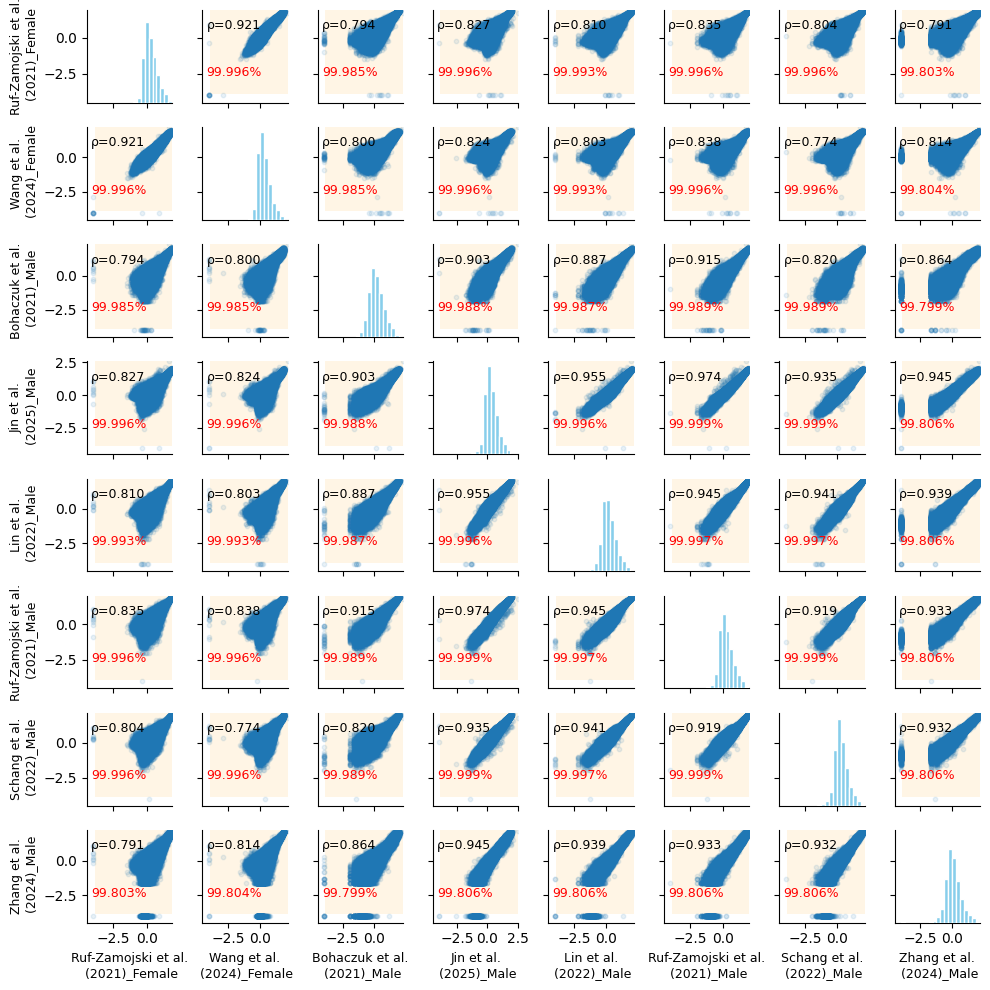

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np
import matplotlib.patches as patches

def scatter_with_rectangle(x, y, **kwargs):
    ax = plt.gca()

    # 1. Define the bounds
    lower_limit = -3.9
    max_x = np.max(x)
    max_y = np.max(y)

    # 2. Draw the rectangle
    # Rectangle((x,y), width, height)
    rect = patches.Rectangle(
        (lower_limit, lower_limit),
        max_x - lower_limit,
        max_y - lower_limit,
        linewidth=0,
        edgecolor='none',
        facecolor='orange',
        alpha=0.1,
        zorder=0
    )
    ax.add_patch(rect)

    # 3. Scatter points
    ax.scatter(x, y, s=10, alpha=0.1, zorder=1)

    # 4. Spearman correlation
    rho, p = spearmanr(x, y)
    ax.text(
        0.05, 0.90,
        f"ρ={rho:.3f}",
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=9
    )

    # 5. Fraction of points inside the rectangle
    # Condition: x > -3.9 AND y > -3.9
    inside = (x >= lower_limit) & (y >= lower_limit)
    frac_inside = np.sum(inside) / len(y) * 100

    ax.text(
        0.05, 0.25,
        f"{frac_inside:.3f}%",
        transform=ax.transAxes,
        ha="left", va="bottom",
        fontsize=9,
        color='red'
    )

    #plot to start min x and min y from -4.5 -4.5
    plt.xlim(-4.5, max_x)
    plt.ylim(-4.5, max_y)

# build PairGrid
g = sns.PairGrid(df, height=2.5)
g.map_diag(plt.hist, bins=20, color='skyblue', edgecolor='white')
g.map_offdiag(scatter_with_rectangle)

# Adjust axis labels
for i, row in enumerate(g.axes):
    for j, ax in enumerate(row):
        if i == g.axes.shape[0] - 1:
            ax.set_xlabel(df.columns[j], fontsize=9, rotation=0)
        else:
            ax.set_xlabel("")
        if j == 0:
            ax.set_ylabel(df.columns[i], fontsize=9)
        else:
            ax.set_ylabel("")

g.fig.set_size_inches(10, 10)
#tick size 8
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#tight layout
plt.tight_layout()

#save as png dpi 500 and svg
plt.savefig('scatter_with_rectangle.png', dpi=500)
#plt.savefig('scatter_with_rectangle.svg')


plt.show()



In [33]:
!pip freeze

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.3
aiosignal==1.4.0
aiosqlite==0.22.1
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.18.3
altair==5.5.0
anndata==0.12.10
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.1
anywidget==0.9.21
apsw==3.51.2.0
apswutils==0.1.2
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array-api-compat==1.13.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2026.2.2.0.48.1
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.18.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.33.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==4.0.0
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==7.0.